# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

This data is related with direct marketing campaigns of a Portugese banking institution, in which these marketing campaigns were based on phone calls.

The dataset is related to 17 campaigns that occured between May 2008 and November 2010, corresponding to a total of 79354 contacts. 

During these phone campaigns, a long-term deposit application, with good interest rates, was offered.

For each contact, a large numbeer of attributes was stored in addition to if there was a success (i.e, the target variable, as the goal is to predict if the client will subscribe a term deposit).

Throughout the entire database, there were 6499 successes (8% success rate)

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.svm import SVC
import time

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



#### Step 1) Identify missing values

In [4]:
df.isnull().sum().sort_values()

age               0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
campaign          0
nr.employed       0
duration          0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
job               0
day_of_week       0
y                 0
dtype: int64

#### Step 2) Explore each variable

Text(0.5, 0, 'Success')

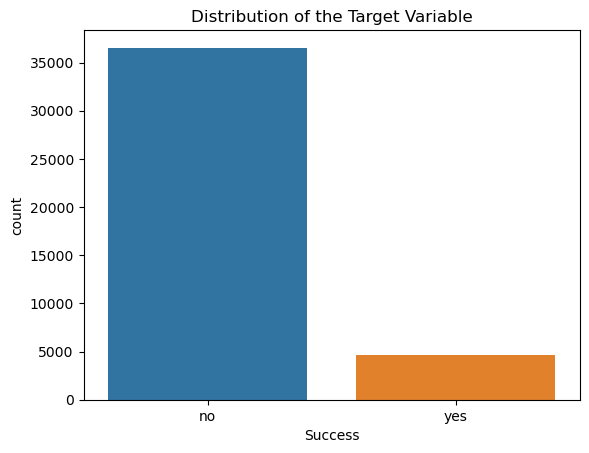

In [5]:
# Target variable
sns.countplot(df, x = 'y')
plt.title('Distribution of the Target Variable')
plt.xlabel('Success')

In [6]:
# age
df['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [7]:
# job
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [8]:
# marital (marital status)
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [9]:
# education
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [10]:
# default (has credit in default)
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [11]:
# housing (has housing loan)
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [12]:
# loan (has personal loan)
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [13]:
# contact (contact communication type)
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [14]:
# month (last contact month of year)
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [15]:
# day_of_week (last contact day of the week)
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [16]:
# duration (last contact duration in seconds)
df['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [17]:
# campaign
df['campaign'].describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [18]:
# pdays (number of days that passed by after the client was last contacted from a previous campaign)
df['pdays'].describe()

count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

<Axes: xlabel='pdays', ylabel='Count'>

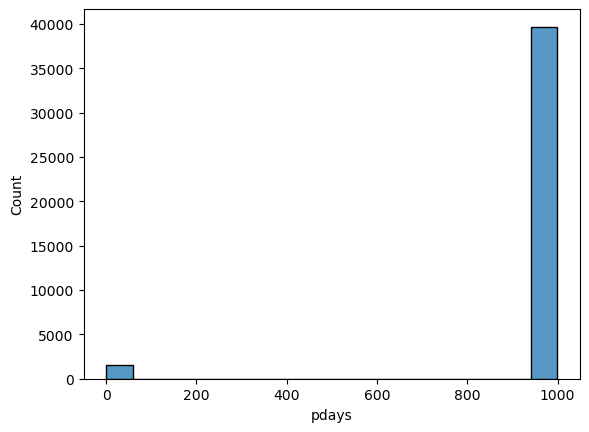

In [19]:
sns.histplot(df['pdays'])

In [20]:
# previous (number of contacts performed before this campaign and for this client)
df['previous'].describe()

count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

In [21]:
# poutcome (outcome of the previous marketing campaign)
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [22]:
# emp.var.rate (employment variation rate - quarterly indicator)
df['emp.var.rate'].describe()

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [23]:
# cons.price.idx (consumer price index - monthly indicator)
df['cons.price.idx'].describe()

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

In [24]:
# cons.conf.idx (consumer confidence index - monthly indicator)
df['cons.conf.idx'].describe()

count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64

In [25]:
# euribor3m (euribor 3 month rate - daily indicator)
df['euribor3m'].describe()

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

In [26]:
# nr.employed: number of employees - quarterly indicator
df['nr.employed'].describe()

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

### Data Preparation
1) Remove 'duration', as this column is not appropriate for predictive models
2) Remove 'pdays', since previous contact is already within the column named 'previous'
3) Convert categorical columns into dummy variables
4) Scale numerical columns

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The business objective is to develop a model that can identify the factors that determine whether a marketing contact will be successful (i.e., the client will subscribe a term deposit)

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [28]:
# Select the first 7 feature columns
X = df.iloc[:, 0:7]
X.shape

(41188, 7)

In [29]:
# Select the target variable
y = df['y']

In [30]:
# Make column transformer
# Convert categorical columns into dummy variables
# Scale numeric column (i.e, age column)
selector = make_column_selector(dtype_include=object)
transformer = make_column_transformer((OneHotEncoder(), selector), remainder=StandardScaler())

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [32]:
y_test.value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

If we predict all values are 'no', then there is an 88.7% chance of predicting correctly.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [33]:
start = time.time()
lr_pipe = Pipeline([
    ('transform', transformer),
    ('lr', LogisticRegression(max_iter=10000, random_state=42))
])
lr_pipe.fit(X_train, y_train)
lr_y_pred = lr_pipe.predict(X_test)
end = time.time()

### Problem 9: Score the Model

What is the accuracy of your model?

In [34]:
lr_train_accuracy = lr_pipe.score(X_train, y_train)
lr_test_accuracy = lr_pipe.score(X_test, y_test)
lr_test_precision = precision_score(y_test, lr_y_pred, pos_label='yes')
lr_test_recall = recall_score(y_test, lr_y_pred, pos_label='yes') 
lr_time = end-start

print(f"Accuracy score for Logistic Regression on train data: {lr_train_accuracy}\n")
print(f"Accuracy score for Logistic Regression on test data: {lr_test_accuracy}\n")
print(f"Precision score for Logistic Regression: {lr_test_precision}\n")
print(f"Recall score for Logistic Regression: {lr_test_recall}\n")
print(f"Time for Logistic Regression: {lr_time}")

Accuracy score for Logistic Regression on train data: 0.8873458288821987

Accuracy score for Logistic Regression on test data: 0.8873458288821987

Precision score for Logistic Regression: 0.0

Recall score for Logistic Regression: 0.0

Time for Logistic Regression: 0.4053378105163574


C:\Users\hansm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

#### KNN Model

In [35]:
# KNN Model
start = time.time()
knn_pipe = Pipeline([
    ('transform', transformer),
    ('knn', KNeighborsClassifier())
])
knn_pipe.fit(X_train, y_train)
knn_y_pred = knn_pipe.predict(X_test)
end = time.time()

In [36]:
knn_train_accuracy = knn_pipe.score(X_train, y_train)
knn_test_accuracy = knn_pipe.score(X_test, y_test)
knn_test_precision = precision_score(y_test, knn_y_pred, pos_label='yes')
knn_test_recall = recall_score(y_test, knn_y_pred, pos_label='yes') 
knn_time = end-start

print(f"Accuracy score for KNN on train data: {knn_train_accuracy}\n")
print(f"Accuracy score for KNN on test data: {knn_test_accuracy}\n")
print(f"Precision score for KNN: {knn_test_precision}\n")
print(f"Recall score for KNN: {knn_test_recall}\n")
print(f"Time for KNN: {knn_time}")

Accuracy score for KNN on train data: 0.8917484056845035

Accuracy score for KNN on test data: 0.8792852287073905

Precision score for KNN: 0.3218884120171674

Recall score for KNN: 0.06465517241379311

Time for KNN: 5.344420433044434


#### Decision Tree Model

In [37]:
# Decision Tree Model
start = time.time()
dt_pipe = Pipeline([
    ('transform', transformer),
    ('knn', DecisionTreeClassifier())
])
dt_pipe.fit(X_train, y_train)
dt_y_pred = dt_pipe.predict(X_test)
end = time.time()

In [38]:
dt_train_accuracy = dt_pipe.score(X_train, y_train)
dt_test_accuracy = dt_pipe.score(X_test, y_test)
dt_test_precision = precision_score(y_test, dt_y_pred, pos_label='yes')
dt_test_recall = recall_score(y_test, dt_y_pred, pos_label='yes') 
dt_time = end-start

print(f"Accuracy score for Decision Tree Model on train data: {dt_train_accuracy}\n")
print(f"Accuracy score for Decision Tree on test data: {dt_test_accuracy}\n")
print(f"Precision score for Decision Tree Model: {dt_test_precision}\n")
print(f"Recall score for Decision Tree Model: {dt_test_recall}\n")
print(f"Time for Decision Tree Model: {dt_time}")

Accuracy score for Decision Tree Model on train data: 0.9177754038393059

Accuracy score for Decision Tree on test data: 0.8658832669709624

Precision score for Decision Tree Model: 0.23627684964200477

Recall score for Decision Tree Model: 0.0853448275862069

Time for Decision Tree Model: 0.7567129135131836


#### Support Vector Machine Model

In [39]:
# Support Vector Machine Model
start = time.time()
svc_pipe = Pipeline([
    ('transform', transformer),
    ('svc', SVC())
])
svc_pipe.fit(X_train, y_train)
svc_y_pred = svc_pipe.predict(X_test)
end = time.time()

In [40]:
svc_train_accuracy = svc_pipe.score(X_train, y_train)
svc_test_accuracy = svc_pipe.score(X_test, y_test)
svc_test_precision = precision_score(y_test, svc_y_pred, pos_label='yes')
svc_test_recall = recall_score(y_test, svc_y_pred, pos_label='yes') 
svc_time = end-start

print(f"Accuracy score for Support Vector Machine Model on train data: {svc_train_accuracy}\n")
print(f"Accuracy score for Support Vector Machine Model on test data: {svc_test_accuracy}\n")
print(f"Precision score for Support Vector Machine Model: {svc_test_precision}\n")
print(f"Recall score for Support Vector Machine Model: {svc_test_recall}\n")
print(f"Time for Support Vector Machine Model: {svc_time}")

Accuracy score for Support Vector Machine Model on train data: 0.8880903823120002

Accuracy score for Support Vector Machine Model on test data: 0.8864717878993882

Precision score for Support Vector Machine Model: 0.3333333333333333

Recall score for Support Vector Machine Model: 0.007758620689655172

Time for Support Vector Machine Model: 59.7135112285614


#### Compiled Results

In [41]:
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Support Vector Machine']
train_time = [lr_time, knn_time, dt_time, svc_time]
train_acc = [lr_train_accuracy, knn_train_accuracy, dt_train_accuracy, svc_train_accuracy]
test_acc = [lr_test_accuracy, knn_test_accuracy, dt_test_accuracy, svc_test_accuracy]
test_precision = [lr_test_precision, knn_test_precision, dt_test_precision, svc_test_precision]
test_recall = [lr_test_recall, knn_test_recall, dt_test_recall, svc_test_recall]
results = pd.DataFrame({'Model': models, 'Train Time': train_time, 'Train Accuracy': train_acc, 'Test Accuracy': test_acc, 'Test Precision': test_precision, 'Test Recall': test_recall})
results

,Model,Train Time,Train Accuracy,Test Accuracy,Test Precision,Test Recall
0,Logistic Regression,0.405338,0.887346,0.887346,0.000000,0.000000
1,K-Nearest Neighbors,5.344420,0.891748,0.879285,0.321888,0.064655
2,Decision Tree,0.756713,0.917775,0.865883,0.236277,0.085345
3,Support Vector Machine,59.713511,0.888090,0.886472,0.333333,0.007759


Text(0.5, 1.0, 'KNN Confusion Matrix for Test Set')

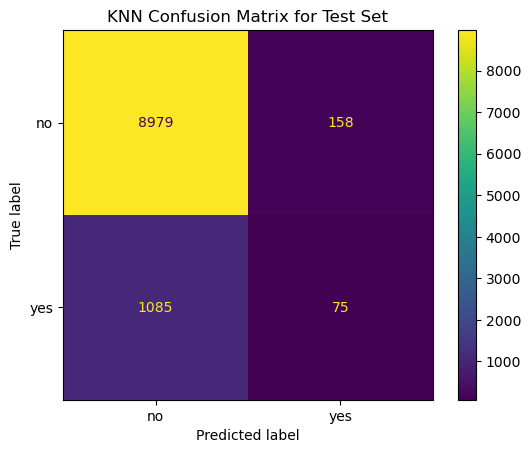

In [42]:
# KNN Confusion Matrix
knn_confusion_matrix = confusion_matrix(y_test, knn_y_pred, labels=knn_pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=knn_confusion_matrix, display_labels=['no', 'yes'])
disp.plot()
plt.title('KNN Confusion Matrix for Test Set')

Text(0.5, 1.0, 'Decision Tree Confusion Matrix for Test Set')

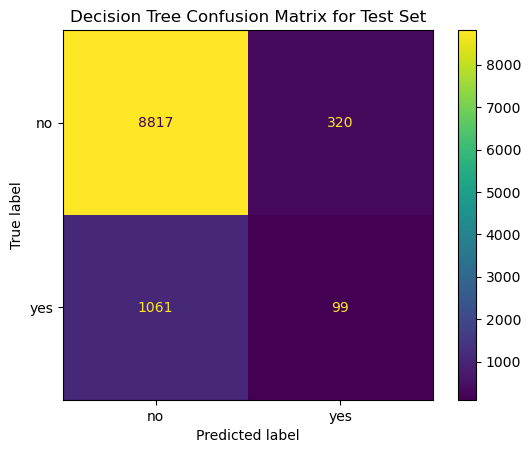

In [43]:
# Decision Tree Confusion Matrix
dt_confusion_matrix = confusion_matrix(y_test, dt_y_pred, labels=dt_pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=dt_confusion_matrix, display_labels=['no', 'yes'])
disp.plot()
plt.title('Decision Tree Confusion Matrix for Test Set')

Text(0.5, 1.0, 'Support Vector Machine Confusion Matrix for Test Set')

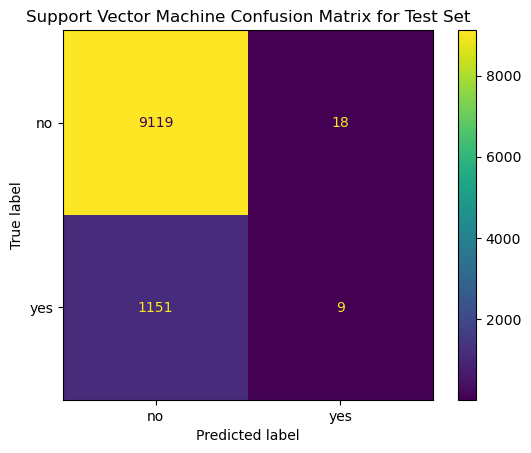

In [44]:
# Support Vector Machine Confusion Matrix
svc_confusion_matrix = confusion_matrix(y_test, svc_y_pred, labels=svc_pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=svc_confusion_matrix, display_labels=['no', 'yes'])
disp.plot()
plt.title('Support Vector Machine Confusion Matrix for Test Set')

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### Feature Engineering and Exploration 

Text(0, 0.5, 'Success')

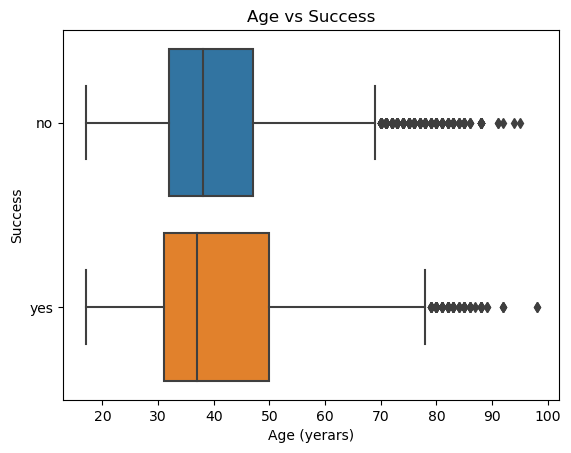

In [45]:
# Plot age vs Success
sns.boxplot(data=df, x='age', y='y')
plt.title('Age vs Success')
plt.xlabel('Age (yerars)')
plt.ylabel('Success')

No distinction by age. Remove age from the model.

Text(0.5, 0, 'Job Type')

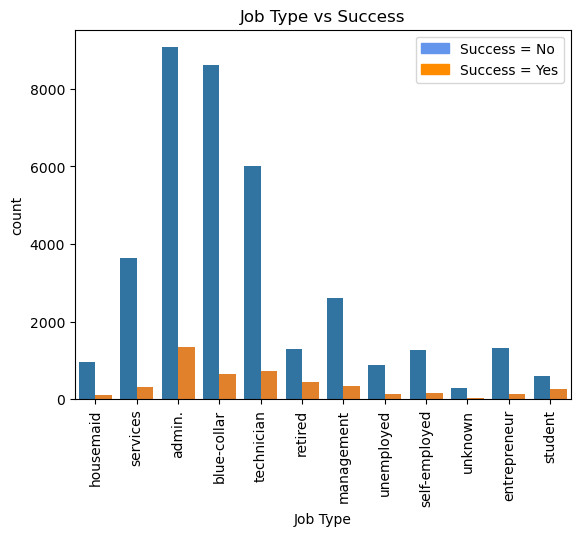

In [46]:
# Plot job vs Success
sns.countplot(data=df, x='job', hue='y')
plt.xticks(rotation=90)
top_bar = mpatches.Patch(color='cornflowerblue', label='Success = No')
bottom_bar = mpatches.Patch(color='darkorange', label='Success = Yes')
plt.legend(handles=[top_bar, bottom_bar])
plt.title('Job Type vs Success')
plt.xlabel('Job Type')

Text(0.5, 0, 'Marital Status')

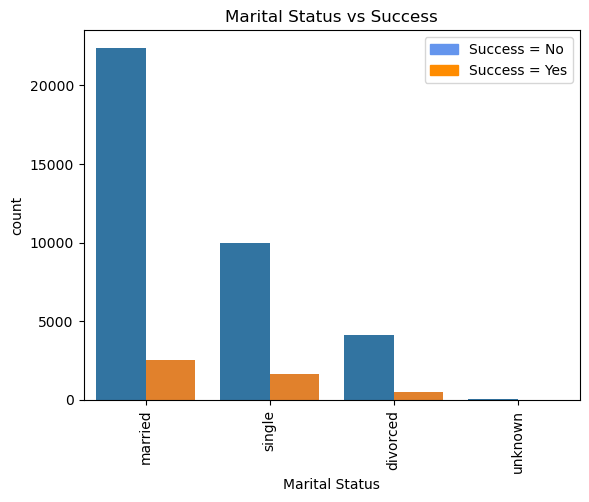

In [47]:
# Plot Marital Status vs Success
sns.countplot(data=df, x='marital', hue='y')
plt.xticks(rotation=90)
top_bar = mpatches.Patch(color='cornflowerblue', label='Success = No')
bottom_bar = mpatches.Patch(color='darkorange', label='Success = Yes')
plt.legend(handles=[top_bar, bottom_bar])
plt.title('Marital Status vs Success')
plt.xlabel('Marital Status')

Text(0.5, 0, 'Education')

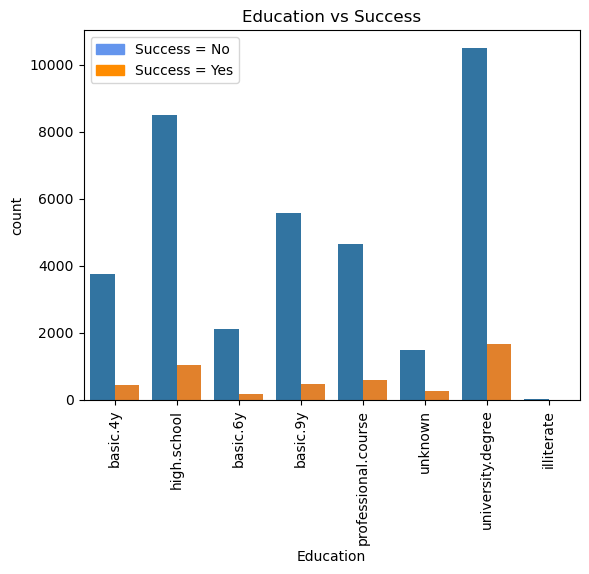

In [48]:
# Plot Education vs Success
sns.countplot(data=df, x='education', hue='y')
plt.xticks(rotation=90)
top_bar = mpatches.Patch(color='cornflowerblue', label='Success = No')
bottom_bar = mpatches.Patch(color='darkorange', label='Success = Yes')
plt.legend(handles=[top_bar, bottom_bar])
plt.title('Education vs Success')
plt.xlabel('Education')

Text(0.5, 0, 'Credit Default')

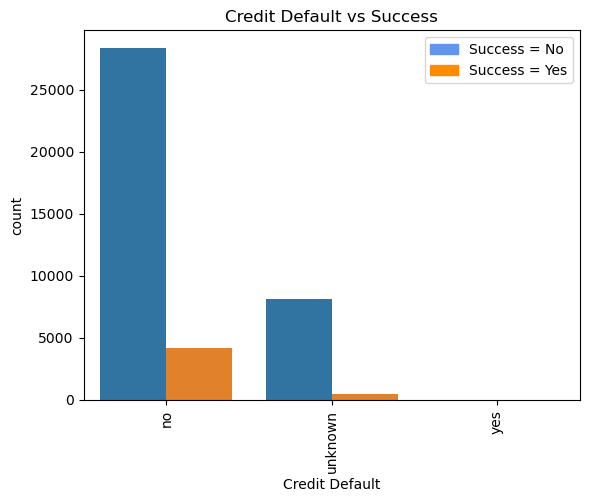

In [49]:
# Plot Credit Default History vs Success
sns.countplot(data=df, x='default', hue='y')
plt.xticks(rotation=90)
top_bar = mpatches.Patch(color='cornflowerblue', label='Success = No')
bottom_bar = mpatches.Patch(color='darkorange', label='Success = Yes')
plt.legend(handles=[top_bar, bottom_bar])
plt.title('Credit Default vs Success')
plt.xlabel('Credit Default')

Text(0.5, 0, 'Housing Loan Status')

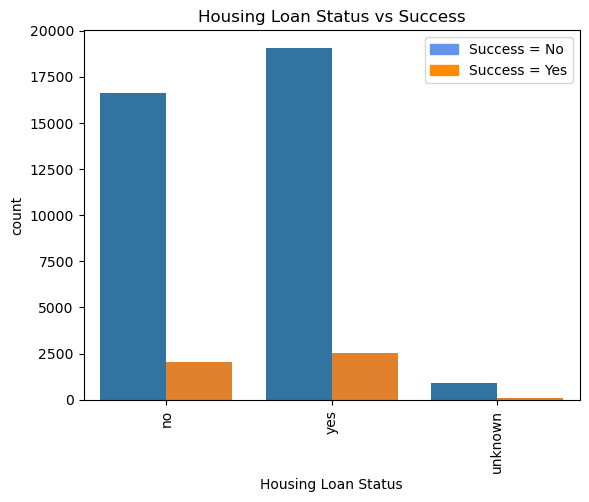

In [50]:
# Plot Housing Loan vs Success
sns.countplot(data=df, x='housing', hue='y')
plt.xticks(rotation=90)
top_bar = mpatches.Patch(color='cornflowerblue', label='Success = No')
bottom_bar = mpatches.Patch(color='darkorange', label='Success = Yes')
plt.legend(handles=[top_bar, bottom_bar])
plt.title('Housing Loan Status vs Success')
plt.xlabel('Housing Loan Status')

Text(0.5, 0, 'Personal Loan Status')

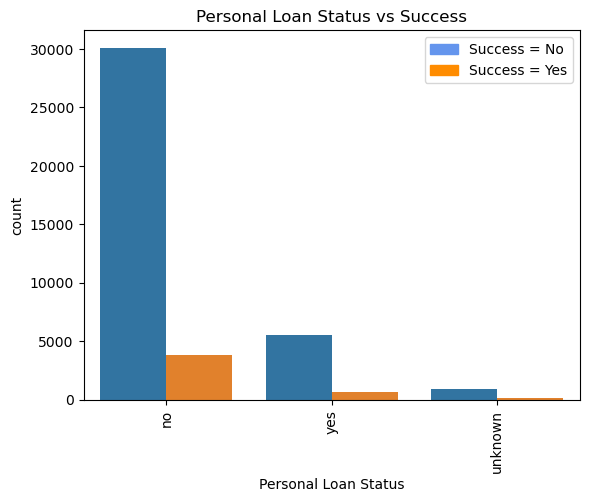

In [51]:
# Plot Personal Loan vs Success
sns.countplot(data=df, x='loan', hue='y')
plt.xticks(rotation=90)
top_bar = mpatches.Patch(color='cornflowerblue', label='Success = No')
bottom_bar = mpatches.Patch(color='darkorange', label='Success = Yes')
plt.legend(handles=[top_bar, bottom_bar])
plt.title('Personal Loan Status vs Success')
plt.xlabel('Personal Loan Status')

Remove age. Keep all other variables.

In [52]:
X = X.drop(['age'], axis=1)
X.head()

,job,marital,education,default,housing,loan
0,housemaid,married,basic.4y,no,no,no
1,services,married,high.school,unknown,no,no
2,services,married,high.school,no,yes,no
3,admin.,married,basic.6y,no,no,no
4,services,married,high.school,no,no,yes


In [53]:
# Create new Training and Test Data Sets without Age Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

#### Fine-tune KNN Model

Find optimum k value

In [54]:
knn_params = {'knn__n_neighbors': np.array(range(55,58,1))}

knn_pipe = Pipeline([
    ('transform', transformer),
    ('knn', KNeighborsClassifier())
])

In [55]:
knn_grid = GridSearchCV(knn_pipe, param_grid=knn_params).fit(X_train, y_train)
knn_grid.best_params_

{'knn__n_neighbors': 55}

In [56]:
knn_grid.best_params_['knn__n_neighbors']

55

Set decision Boundary

In [57]:
# Run model using best params
knn_pipe = Pipeline([
    ('transform', transformer),
    ('knn', KNeighborsClassifier(n_neighbors=knn_grid.best_params_['knn__n_neighbors']))
]).fit(X_train, y_train)

In [58]:
# Compare training metrics
knn_train_preds = knn_pipe.predict(X_train)
knn_train_accuracy = accuracy_score(y_train, knn_train_preds)
knn_train_precision = precision_score(y_train, knn_train_preds, pos_label='yes')
knn_train_recall = recall_score(y_train, knn_train_preds, pos_label='yes')

print(f"Accuracy Score for KNN on Training Data: {knn_train_accuracy}\n")
print(f"Precision Score for KNN on Training Data: {knn_train_precision}\n")
print(f"Recall Score for KNN on Training Data: {knn_train_recall}")

C:\Users\hansm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score for KNN on Training Data: 0.8873458288821987

Precision Score for KNN on Training Data: 0.0

Recall Score for KNN on Training Data: 0.0


In [59]:
# Compare test metrics
knn_test_preds = knn_pipe.predict(X_test)
knn_test_accuracy = accuracy_score(y_test, knn_test_preds)
knn_test_precision = precision_score(y_test, knn_test_preds, pos_label='yes')
knn_test_recall = recall_score(y_test, knn_test_preds, pos_label='yes')

print(f"Accuracy Score for KNN on Test Data: {knn_test_accuracy}\n")
print(f"Precision Score for KNN on Test Data: {knn_test_precision}\n")
print(f"Recall Score for KNN on Test Data: {knn_test_recall}")

Accuracy Score for KNN on Test Data: 0.8873458288821987

Precision Score for KNN on Test Data: 0.0

Recall Score for KNN on Test Data: 0.0


C:\Users\hansm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


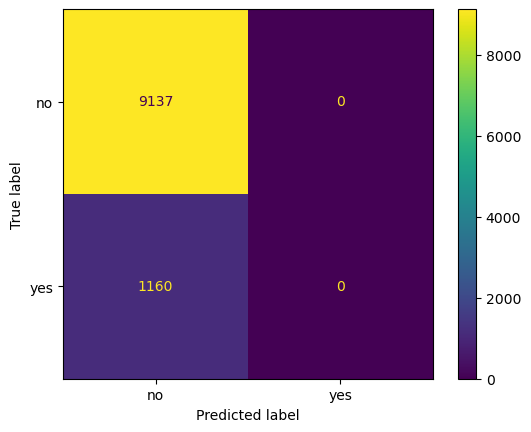

In [60]:
knn_confusion_matrix = confusion_matrix(y_test, knn_test_preds, labels=knn_pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=knn_confusion_matrix, display_labels=['no', 'yes'])
disp.plot()
plt.show()

Based on the confusion matrix, the model is not trying to classify data. Thus, we need to change the decision threshold.

In [61]:
thresholds = np.arange(0, 1, .1)
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [62]:
test_predictions = knn_pipe.predict_proba(X_test)
test_predictions[1:5]

array([[0.98181818, 0.01818182],
       [0.94545455, 0.05454545],
       [0.90909091, 0.09090909],
       [0.96363636, 0.03636364]])

In [63]:
def accuracy_thresh(predict_probs, y_test, thresh):
    preds = np.where(predict_probs >= thresh, 'yes', 'no')
    return accuracy_score(y_test, preds)

In [64]:
results_df = pd.DataFrame({'threshold': thresholds, 'accuracy': [accuracy_thresh(test_predictions[:, 1], y_test, i) for i in thresholds]})
results_df

,threshold,accuracy
0,0.0,0.112654
1,0.1,0.576673
2,0.2,0.835777
3,0.3,0.883850
4,0.4,0.886666
5,0.5,0.887346
6,0.6,0.887346
7,0.7,0.887346
8,0.8,0.887346
9,0.9,0.887346


KNN Model is the same as the baseline model

#### Fine-tune Logistic Regression Model

Select Features 

In [65]:
extractor = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', random_state=42))
lr_pipe = Pipeline([
    ('transform', transformer),
    ('extractor', extractor),
    ('lr', LogisticRegression(max_iter=10000, random_state=42))
]).fit(X_train, y_train)
feature_names = lr_pipe.named_steps['transform'].get_feature_names_out()
selected_features=feature_names[[int(i[1:]) for i in lr_pipe.named_steps['extractor'].get_feature_names_out()]]
clean_names = [i.split('__')[-1] for i in selected_features]
clean_names

['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_unknown',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_unknown',
 'housing_no',
 'housing_yes',
 'loan_yes']

In [66]:
# Compare training metrics
lr_train_preds = lr_pipe.predict(X_train)
lr_test_preds = lr_pipe.predict(X_test)
lr_train_acc = accuracy_score(y_train, lr_train_preds)
lr_test_acc = accuracy_score(y_test, lr_test_preds)
print(f"Accuracy Score for Logistic Regression on Training Data: {lr_train_acc}")
print(f"Accuracy Score for Logistic Regression on Testing Data: {lr_test_acc}")

Accuracy Score for Logistic Regression on Training Data: 0.8873458288821987
Accuracy Score for Logistic Regression on Testing Data: 0.8873458288821987


In [67]:
coef_df = pd.DataFrame({'feature': clean_names, 'coefs': lr_pipe.named_steps['lr'].coef_[0]})
coef_df = coef_df.sort_values(by = 'coefs', ascending=False)
coef_df = coef_df.set_index('feature')
coef_df

,coefs
feature,
job_retired,1.062706
job_student,1.045323
education_illiterate,0.577269
job_unemployed,0.322571
job_unknown,0.243861
marital_unknown,0.234182
education_unknown,0.206491
education_university.degree,0.096188
job_admin.,0.046981


In [68]:
# Repeat using max features = 10
extractor = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', random_state=42), max_features=10)
lr_pipe = Pipeline([
    ('transform', transformer),
    ('extractor', extractor),
    ('lr', LogisticRegression(max_iter=10000, random_state=42))
]).fit(X_train, y_train)
feature_names = lr_pipe.named_steps['transform'].get_feature_names_out()
selected_features=feature_names[[int(i[1:]) for i in lr_pipe.named_steps['extractor'].get_feature_names_out()]]
clean_names = [i.split('__')[-1] for i in selected_features]
clean_names

['job_blue-collar',
 'job_entrepreneur',
 'job_retired',
 'job_services',
 'job_student',
 'job_unemployed',
 'marital_divorced',
 'education_basic.9y',
 'education_illiterate',
 'default_unknown']

In [69]:
# Compare Metrics
lr_train_preds = lr_pipe.predict(X_train)
lr_test_preds = lr_pipe.predict(X_test)
lr_train_acc = accuracy_score(y_train, lr_train_preds)
lr_test_acc = accuracy_score(y_test, lr_test_preds)
print(f"Accuracy Score for Logistic Regression on Training Data: {lr_train_acc}")
print(f"Accuracy Score for Logistic Regression on Testing Data: {lr_test_acc}")

Accuracy Score for Logistic Regression on Training Data: 0.8873458288821987
Accuracy Score for Logistic Regression on Testing Data: 0.8873458288821987


In [70]:
coef_df = pd.DataFrame({'feature': clean_names, 'coefs': lr_pipe.named_steps['lr'].coef_[0]})
coef_df = coef_df.sort_values(by = 'coefs', ascending=False)
coef_df = coef_df.set_index('feature')
coef_df

,coefs
feature,
job_student,1.177236
job_retired,1.014404
education_illiterate,0.544220
job_unemployed,0.309981
marital_divorced,-0.189513
education_basic.9y,-0.264631
job_entrepreneur,-0.278865
job_services,-0.341287
job_blue-collar,-0.354937


#### Fine-Tune hyperparameters for Decision Tree

In [71]:
dt_pipe = Pipeline([
    ('transform', transformer),
    ('dt', DecisionTreeClassifier())
])
dt_params = {'dt__max_depth': ['None', 3, 8, 12]}

In [72]:
dt_grid = GridSearchCV(dt_pipe, param_grid=dt_params).fit(X_train, y_train)
dt_grid.cv_results_

C:\Users\hansm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hansm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hansm\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\hansm\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\hansm\anaconda3\lib\site-package

{'mean_fit_time': array([0.04490705, 0.08619523, 0.11472945, 0.16701679]),
 'std_fit_time': array([0.0060087 , 0.00438211, 0.00978977, 0.00567546]),
 'mean_score_time': array([0.        , 0.02471561, 0.02353888, 0.02465191]),
 'std_score_time': array([0.        , 0.00183464, 0.0039817 , 0.00172648]),
 'param_dt__max_depth': masked_array(data=['None', 3, 8, 12],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'dt__max_depth': 'None'},
  {'dt__max_depth': 3},
  {'dt__max_depth': 8},
  {'dt__max_depth': 12}],
 'split0_test_score': array([       nan, 0.88736041, 0.88622754, 0.88558019]),
 'split1_test_score': array([       nan, 0.88734218, 0.88604726, 0.88475235]),
 'split2_test_score': array([       nan, 0.88734218, 0.8858854 , 0.88410489]),
 'split3_test_score': array([       nan, 0.88734218, 0.88750405, 0.88701845]),
 'split4_test_score': array([       nan, 0.88734218, 0.8858854 , 0.88378116]),
 'mean_test_score': array([

In [73]:
dt_pipe = Pipeline([
    ('transform', transformer),
    ('dt', DecisionTreeClassifier(max_depth=3))
]).fit(X_train, y_train)
dt_pipe.score(X_train, y_train)

0.8873458288821987

In [74]:
dtree_text = export_text(dt_pipe.named_steps['dt'])
print(dtree_text)

|--- feature_24 <= 0.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_17 <= 0.50
|   |   |   |--- class: no
|   |   |--- feature_17 >  0.50
|   |   |   |--- class: no
|   |--- feature_5 >  0.50
|   |   |--- feature_23 <= 0.50
|   |   |   |--- class: no
|   |   |--- feature_23 >  0.50
|   |   |   |--- class: no
|--- feature_24 >  0.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_8 <= 0.50
|   |   |   |--- class: no
|   |   |--- feature_8 >  0.50
|   |   |   |--- class: no
|   |--- feature_5 >  0.50
|   |   |--- feature_16 <= 0.50
|   |   |   |--- class: no
|   |   |--- feature_16 >  0.50
|   |   |   |--- class: no



#### Search and remove duplicate observations

In [75]:
dfclean = df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'y']]
dfclean = dfclean.drop_duplicates(subset=['job', 'marital', 'education', 'default', 'housing', 'loan'], keep='first')
dfclean.shape

(1726, 7)

In [76]:
dfclean['y'].value_counts(normalize=True)

no     0.940324
yes    0.059676
Name: y, dtype: float64

#### Fine Tune hyperparameters for SVC and grid search

In [77]:
params = {'svc__kernel': ['poly', 'linear', 'sigmoid']}

svc_pipe = Pipeline([
    ('transform', transformer),
    ('svc', SVC())
])

In [78]:
start = time.time()
svc_grid = GridSearchCV(svc_pipe, param_grid=params).fit(X_train, y_train)
end = time.time()

In [79]:
svc_grid.best_params_

{'svc__kernel': 'linear'}

In [80]:
svc_pipe = Pipeline([
    ('transform', transformer),
    ('svc', SVC(kernel=svc_grid.best_params_['svc__kernel']))
]).fit(X_train, y_train)
svc_pipe.score(X_train, y_train)

0.8873458288821987

#### Descriptive Statistics

In [81]:
import scipy.stats as stats

In [82]:
# Create contingency table between 'job' feature and success rate ('y' column)
job_contingency_table = pd.crosstab(dfclean['y'], dfclean['job'])

# Apply chi-square test on contingency table
job_chi = stats.chi2_contingency(job_contingency_table)[0]

# Compile results into dataframe
data_list = [['job', job_chi]]

chi_table = pd.DataFrame(data_list, columns=['Column', 'Chi-Square'])
chi_table

,Column,Chi-Square
0,job,22.383324


In [83]:
# Create contingency table between 'marital' feature and success rate ('y' column)
marital_contingency_table = pd.crosstab(dfclean['y'], dfclean['marital'])

# Apply chi-square test on contingency table
marital_chi = stats.chi2_contingency(marital_contingency_table)[0]

chi_table = chi_table.append({'Column': 'marital', 'Chi-Square': marital_chi}, ignore_index=True)
chi_table

C:\Users\hansm\AppData\Local\Temp\ipykernel_29504\157119295.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi_table = chi_table.append({'Column': 'marital', 'Chi-Square': marital_chi}, ignore_index=True)


,Column,Chi-Square
0,job,22.383324
1,marital,8.012887


In [84]:
# Create contingency table between 'education' feature and success rate ('y' column)
education_contingency_table = pd.crosstab(dfclean['y'], dfclean['education'])

# Apply chi-square test on contingency table
education_chi = stats.chi2_contingency(education_contingency_table)[0]

chi_table = chi_table.append({'Column': 'education', 'Chi-Square': education_chi}, ignore_index=True)
chi_table

C:\Users\hansm\AppData\Local\Temp\ipykernel_29504\1637195933.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi_table = chi_table.append({'Column': 'education', 'Chi-Square': education_chi}, ignore_index=True)


,Column,Chi-Square
0,job,22.383324
1,marital,8.012887
2,education,23.732190


In [85]:
# Create contingency table between 'default' feature and success rate ('y' column)
default_contingency_table = pd.crosstab(dfclean['y'], dfclean['default'])

# Apply chi-square test on contingency table
default_chi = stats.chi2_contingency(default_contingency_table)[0]

chi_table = chi_table.append({'Column': 'default', 'Chi-Square': default_chi}, ignore_index=True)
chi_table

C:\Users\hansm\AppData\Local\Temp\ipykernel_29504\1281460472.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi_table = chi_table.append({'Column': 'default', 'Chi-Square': default_chi}, ignore_index=True)


,Column,Chi-Square
0,job,22.383324
1,marital,8.012887
2,education,23.732190
3,default,3.225474


In [86]:
# Create contingency table between 'housing' feature and success rate ('y' column)
housing_contingency_table = pd.crosstab(dfclean['y'], dfclean['housing'])

# Apply chi-square test on contingency table
housing_chi = stats.chi2_contingency(housing_contingency_table)[0]

chi_table = chi_table.append({'Column': 'housing', 'Chi-Square': housing_chi}, ignore_index=True)
chi_table

C:\Users\hansm\AppData\Local\Temp\ipykernel_29504\2643351500.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi_table = chi_table.append({'Column': 'housing', 'Chi-Square': housing_chi}, ignore_index=True)


,Column,Chi-Square
0,job,22.383324
1,marital,8.012887
2,education,23.732190
3,default,3.225474
4,housing,2.463106


In [87]:
# Create contingency table between 'loan' feature and success rate ('y' column)
loan_contingency_table = pd.crosstab(dfclean['y'], dfclean['loan'])

# Apply chi-square test on contingency table
loan_chi = stats.chi2_contingency(loan_contingency_table)[0]

chi_table = chi_table.append({'Column': 'loan', 'Chi-Square': loan_chi}, ignore_index=True)
chi_table

C:\Users\hansm\AppData\Local\Temp\ipykernel_29504\2181617026.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi_table = chi_table.append({'Column': 'loan', 'Chi-Square': loan_chi}, ignore_index=True)


,Column,Chi-Square
0,job,22.383324
1,marital,8.012887
2,education,23.732190
3,default,3.225474
4,housing,2.463106
5,loan,0.194872


In [88]:
# Create table showing percentage of jobs by success
job_contingency_table

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,170,195,124,133,126,137,133,167,65,169,124,80
yes,8,8,9,8,9,12,4,12,12,6,7,8


In [89]:
column =['admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown']
percent = [8/(170+8), 8/(195+8), 9/(124+9), 8/(133+8), 9/(126+9), 12/(137+12), 
          4/(133+4), 12/(167+12), 12/(65+12), 6/(169+6), 7/(124+7), 8/(80+8)]
job_df = pd.DataFrame({'Category':column, 'Percent Success':percent})
job_df['Percent Success']=round(job_df['Percent Success']*100,2)
job_df = job_df.sort_values(by = 'Percent Success', ascending=False)
job_df = job_df.set_index('Category')
job_df

,Percent Success
Category,
student,15.58
unknown,9.09
retired,8.05
entrepreneur,6.77
services,6.70
management,6.67
housemaid,5.67
unemployed,5.34
admin,4.49


In [90]:
# Create table showing percent success by marital status
marital_contingency_table

marital,divorced,married,single,unknown
y,,,,
no,405,670,499,49
yes,27,30,40,6


In [91]:
column =['divorced', 'married', 'single', 'unknown']
percent = [27/(405+27), 30/(670+30), 40/(499+40), 6/(49+6)]
marital_df = pd.DataFrame({'Category':column, 'Percent Success':percent})
marital_df['Percent Success']=round(marital_df['Percent Success']*100,2)
marital_df = marital_df.sort_values(by = 'Percent Success', ascending=False)
marital_df = marital_df.set_index('Category')
marital_df

,Percent Success
Category,
unknown,10.91
single,7.42
divorced,6.25
married,4.29


In [92]:
# Create tale showing percent success by education level
education_contingency_table

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
y,,,,,,,,
no,217,188,236,268,10,231,273,200
yes,8,14,16,12,3,9,16,25


In [93]:
column = ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']
percent = [8/(217+8), 14/(188+14), 16/(236+16), 12/(268+12), 3/(10+3), 9/(231+9), 16/(273+16), 25/(225)]
education_df = pd.DataFrame({'Category':column, 'Percent Success':percent})
education_df['Percent Success']=round(education_df['Percent Success']*100,2)
education_df = education_df.sort_values(by = 'Percent Success', ascending=False)
education_df = education_df.set_index('Category')
education_df

,Percent Success
Category,
illiterate,23.08
unknown,11.11
basic.6y,6.93
basic.9y,6.35
university.degree,5.54
high.school,4.29
professional.course,3.75
basic.4y,3.56


In [94]:
# Create table showing percent success by credit default
default_contingency_table

default,no,unknown,yes
y,,,
no,928,692,3
yes,68,35,0


In [95]:
column = ['no', 'unknown', 'yes']
percent = [68/(928+68), 35/(692+35), 0/(3)]
default_df = pd.DataFrame({'Category':column, 'Percent Success':percent})
default_df['Percent Success']=round(default_df['Percent Success']*100,2)
default_df = default_df.sort_values(by = 'Percent Success', ascending=False)
default_df = default_df.set_index('Category')
default_df

,Percent Success
Category,
no,6.83
unknown,4.81
yes,0.00


In [96]:
# Create table showing percent success by housing loan status
housing_contingency_table

housing,no,unknown,yes
y,,,
no,708,196,719
yes,37,13,53


In [97]:
column = ['no', 'unknown', 'yes']
percent = [37/(708+37), 13/(196+13), 53/(719+53)]
housing_df = pd.DataFrame({'Category':column, 'Percent Success':percent})
housing_df['Percent Success']=round(housing_df['Percent Success']*100,2)
housing_df = housing_df.sort_values(by = 'Percent Success', ascending=False)
housing_df = housing_df.set_index('Category')
housing_df

,Percent Success
Category,
yes,6.87
unknown,6.22
no,4.97


In [98]:
# Create table showing percent success by personal loan status
loan_contingency_table

loan,no,unknown,yes
y,,,
no,840,196,587
yes,51,13,39


In [99]:
column = ['no', 'unknown', 'yes']
percent = [51/(840+51), 13/(196+13), 39/(587+39)]
loan_df = pd.DataFrame({'Category':column, 'Percent Success':percent})
loan_df['Percent Success']=round(loan_df['Percent Success']*100,2)
loan_df = loan_df.sort_values(by = 'Percent Success', ascending=False)
loan_df = loan_df.set_index('Category')
loan_df

,Percent Success
Category,
yes,6.23
unknown,6.22
no,5.72


In [100]:
X_one = X[['education', 'job']]
X_ltrain, X_ltest, y_train, y_test = train_test_split(X_one, y, random_state=42, stratify=y)

In [101]:
extractor = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', random_state=42))
lr_pipe = Pipeline([
    ('transform', transformer),
    ('extractor', extractor),
    ('lr', LogisticRegression(max_iter=10000, random_state=42))
]).fit(X_ltrain, y_train)

In [102]:
lr_train_preds = lr_pipe.predict(X_ltrain)
lr_test_preds = lr_pipe.predict(X_ltest)
lr_train_acc = accuracy_score(y_train, lr_train_preds)
lr_test_acc = accuracy_score(y_test, lr_test_preds)
print(f"Train Accuracy: {lr_train_accuracy}")
print(f"Test Accuracy: {lr_test_accuracy}")

Train Accuracy: 0.8873458288821987
Test Accuracy: 0.8873458288821987


In [103]:
dt_grid = GridSearchCV(dt_pipe, param_grid=dt_params).fit(X_ltrain, y_train)
dt_grid.cv_results_

C:\Users\hansm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hansm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hansm\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\hansm\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\hansm\anaconda3\lib\site-package

{'mean_fit_time': array([0.01738639, 0.0499516 , 0.05541701, 0.06251125]),
 'std_fit_time': array([0.00357989, 0.00160578, 0.00549482, 0.0048263 ]),
 'mean_score_time': array([0.        , 0.01726718, 0.01773038, 0.01657944]),
 'std_score_time': array([0.        , 0.00291101, 0.00361048, 0.00455454]),
 'param_dt__max_depth': masked_array(data=['None', 3, 8, 12],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'dt__max_depth': 'None'},
  {'dt__max_depth': 3},
  {'dt__max_depth': 8},
  {'dt__max_depth': 12}],
 'split0_test_score': array([       nan, 0.88736041, 0.8868749 , 0.88671306]),
 'split1_test_score': array([       nan, 0.88734218, 0.88734218, 0.88734218]),
 'split2_test_score': array([       nan, 0.88734218, 0.88718032, 0.88718032]),
 'split3_test_score': array([       nan, 0.88734218, 0.88734218, 0.88734218]),
 'split4_test_score': array([       nan, 0.88734218, 0.88669472, 0.88637099]),
 'mean_test_score': array([

##### Questions